In [5]:
import time
from utils import *

# from data_preprocessing.ihdp import * 
# from data_preprocessing.lalonde import *
# from data_preprocessing.lbidd import *
# from data_preprocessing.synthetic import *
# from data_preprocessing.twins import *

k = 2
# ci_estimators = ['sl', 'tl', 'xl', 'dml', 'orf', 'dr', 'sparse_dml', 'kernel_dml', 'CausalForestDML']


def causal_inference_analysis(model_y, model_t, str_causal_model,x, y, t, true_ate, true_ate_std, true_ite):
    causal_model = get_estimators(str_causal_model, model_y, model_t)

    start_time = time.time()
    causal_model.fit(y, t, X=x, W=None)
    run_time = time.time() - start_time

    estimated_ate = causal_model.ate(x)
    
    estimated_ite_values = causal_model.effect(x)

    tao_risk, mu_risk = calculate_risks(true_ate, estimated_ate, true_ite, estimated_ite_values)

    return {'est_ate': estimated_ate, 'mu_risk': mu_risk, 'tao_risk': tao_risk, 
            'true_ate_std': true_ate_std, 'run_time': run_time, 
            'model_t': model_t.__class__.__name__, 'model_y': model_y.__class__.__name__}, estimated_ite_values

    

In [4]:
from sklearn.base import BaseEstimator, is_regressor
from sklearn.ensemble import (GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import (ARDRegression, BayesianRidge, ElasticNet,
                                  ElasticNetCV, Lars, Lasso, LassoLars,
                                  LinearRegression, LogisticRegression,
                                  LogisticRegressionCV,
                                  OrthogonalMatchingPursuit, Ridge)
from sklearn.model_selection import (BaseCrossValidator, GridSearchCV, KFold,
                                     RandomizedSearchCV, StratifiedKFold,
                                     check_cv, train_test_split)
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler,
                                   PolynomialFeatures, RobustScaler,
                                   StandardScaler)
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from utils import *

def causal_inference_analysis(model_y, model_t, str_causal_model,x, y, t, true_ate, true_ate_std, true_ite, is_meta):
    causal_model = get_estimators(str_causal_model, model_y, model_t)
    if is_meta:
        start_time = time.time()
        causal_model.fit(y, t, X=x)
        run_time = time.time() - start_time
    else:
        start_time = time.time()
        causal_model.fit(y, t, X=x, W=None)
        run_time = time.time() - start_time

    estimated_ate = causal_model.ate(x)

    estimated_ite_values = causal_model.effect(x)

    tao_risk, mu_risk = calculate_risks(true_ate, estimated_ate, true_ite, estimated_ite_values)

    return {'causal_model_name': causal_model.__class__.__name__, 'model_t': model_t.__class__.__name__, 'model_y': model_y.__class__.__name__,
            'est_ate': estimated_ate, 'true_ate': true_ate, 'mu_risk': mu_risk, 'tao_risk': tao_risk, 
            'run_time': run_time}, estimated_ite_values, causal_model

NameError: name 'y' is not defined

In [14]:
# classifiers = [GradientBoostingClassifier(),
#                RandomForestClassifier(),
#                LogisticRegression(),
#                LogisticRegressionCV(),
#                MLPClassifier(),
#                DecisionTreeClassifier()]

# classifiers = [LogisticRegression()]

# regressors = [GradientBoostingRegressor(),
#             RandomForestRegressor(),
#             LinearRegression(),
#             ElasticNet(),
#             ElasticNetCV(),
#             Lasso(),
#             LassoLars(),
#             OrthogonalMatchingPursuit(),
#             Ridge(),
#             MLPRegressor(),
#             DecisionTreeRegressor()]

# regressors = [LinearRegression()]

ci_estimators = ['dml']

data_dict = {'ihdp':load_ihdp()}
all_results = []
for key in data_dict:
    data, X, T, Y, true_ite, true_ATE, true_ATE_stderr, is_discrete = data_dict[key]


In [16]:

linear = LinearDML(model_y='linear')
linear.fit(Y, T, X=X)

AttributeError: 'str' object has no attribute 'fit'

In [10]:
linear.models_y

[[<econml.sklearn_extensions.linear_model.WeightedLassoCVWrapper at 0x2857e28b0>,

In [12]:
dml = LinearDML(model_t=model_t, model_y=model_y)
dml.fit(Y, T.astype(int), X=X, W=None)

In [13]:
dml.__class__.__name__


'LinearDML'

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ihdp_results = pd.read_csv('results/ihdp_no_params_baselines.csv', index_col=None).drop(columns='Unnamed: 0',axis=1)

In [8]:
ihdp_results.groupby()

Index(['causal_model_name', 'model_t', 'model_y', 'est_ate', 'true_ate',
       'mu_risk', 'tao_risk', 'run_time', 'data'],
      dtype='object')

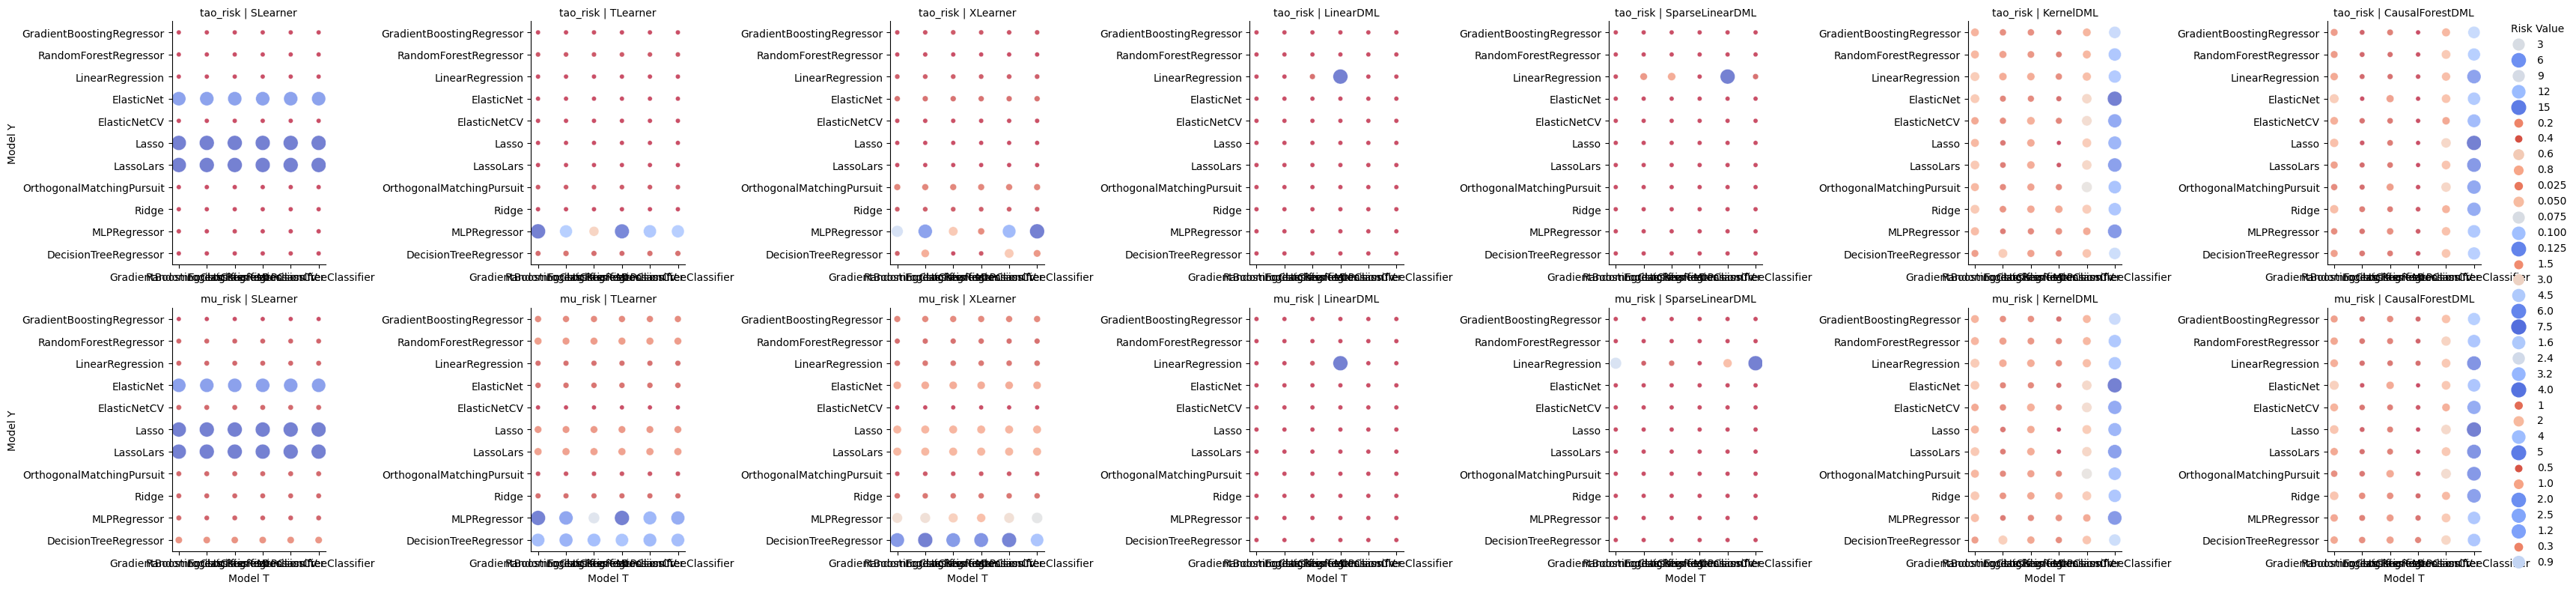

In [22]:
good_ihdp = ihdp_results[ihdp_results['tao_risk'] < 1].reset_index(drop=True)

In [25]:
tao_risk = good_ihdp.sort_values(by='tao_risk')

In [30]:
tao_ci_group = tao_risk.groupby('causal_model_name')


,causal_model_name,model_t,model_y,est_ate,true_ate,mu_risk,tao_risk,run_time,data
78,TLearner,GradientBoostingClassifier,Lasso,4.018302,4.016067,0.662390,0.000005,0.001029,ihdp
79,TLearner,RandomForestClassifier,Lasso,4.018302,4.016067,0.662390,0.000005,0.001126,ihdp
80,TLearner,LogisticRegression,Lasso,4.018302,4.016067,0.662390,0.000005,0.001680,ihdp
81,TLearner,LogisticRegressionCV,Lasso,4.018302,4.016067,0.662390,0.000005,0.002015,ihdp
82,TLearner,MLPClassifier,Lasso,4.018302,4.016067,0.662390,0.000005,0.001685,ihdp
123,XLearner,LogisticRegressionCV,RandomForestRegressor,4.019355,4.016067,0.323295,0.000011,0.536460,ihdp
120,XLearner,GradientBoostingClassifier,RandomForestRegressor,4.020311,4.016067,0.289786,0.000018,0.493058,ihdp
155,XLearner,DecisionTreeClassifier,LassoLars,4.021121,4.016067,0.738182,0.000026,0.004556,ihdp
153,XLearner,LogisticRegressionCV,LassoLars,4.021121,4.016067,0.738182,0.000026,0.014357,ihdp
154,XLearner,MLPClassifier,LassoLars,4.021121,4.016067,0.738182,0.000026,0.004592,ihdp


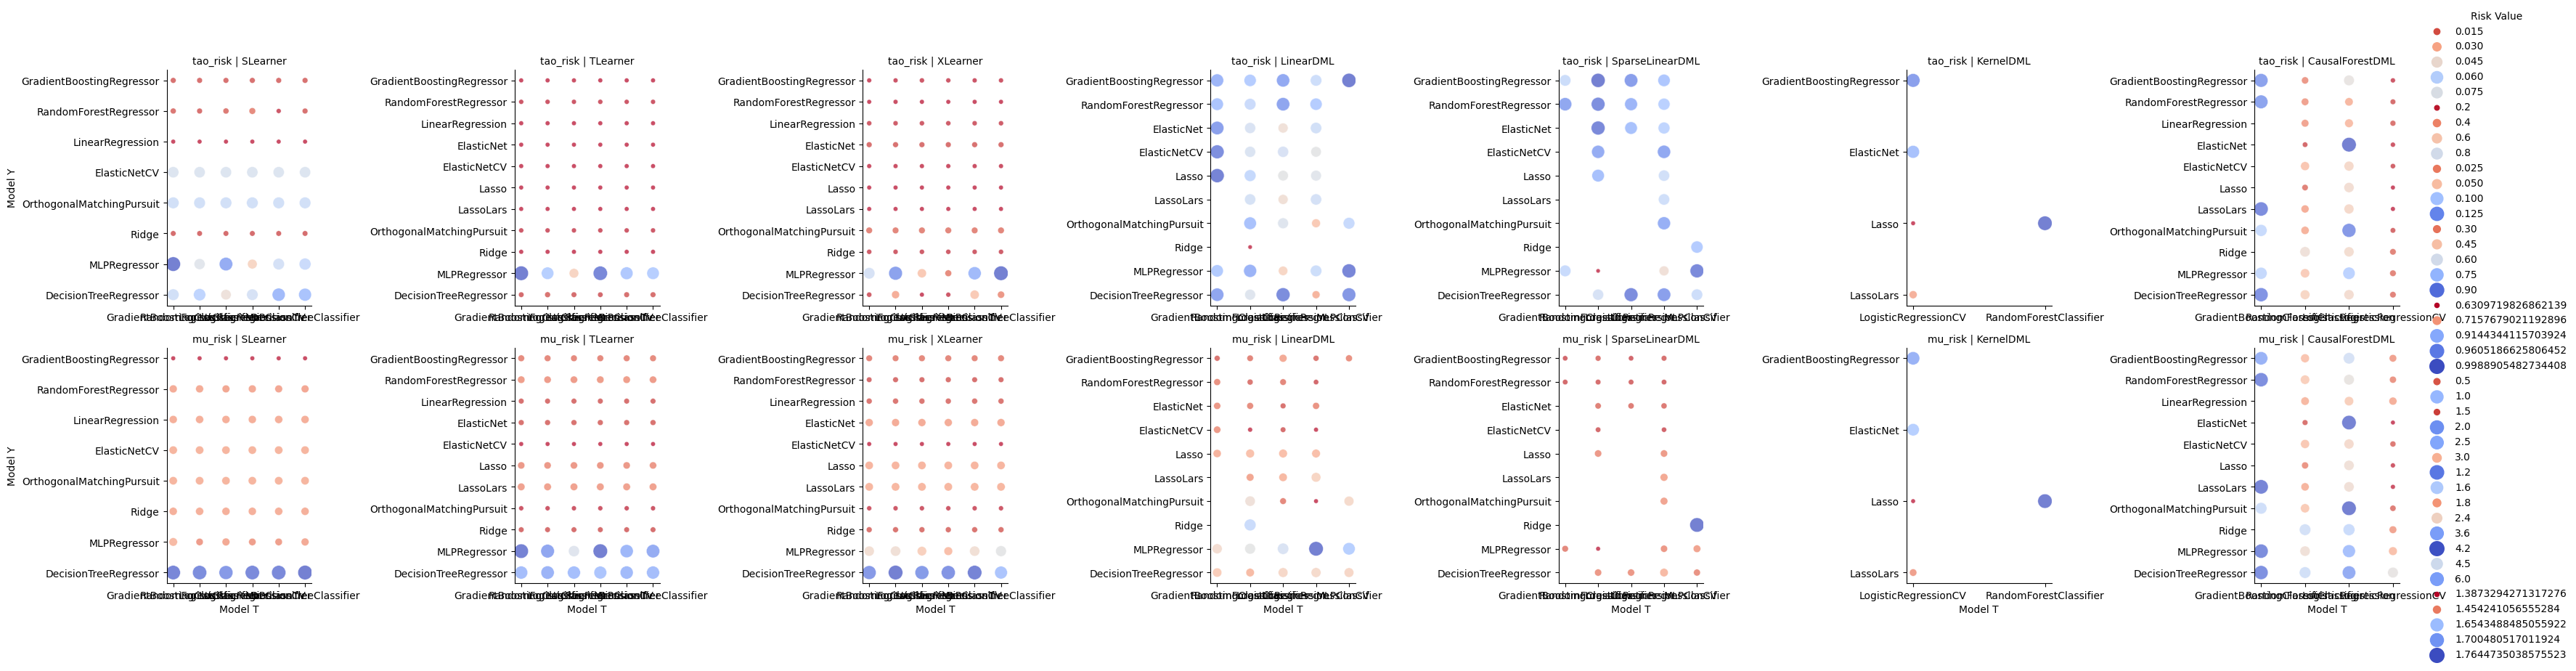

In [24]:
df_relevant = good_ihdp[['causal_model_name', 'model_t', 'model_y', 'tao_risk', 'mu_risk']]
df_melted = df_relevant.melt(id_vars=['causal_model_name', 'model_t', 'model_y'], var_name='risk_type', value_name='risk_value')

# Create a FacetGrid with the causal model names as columns and separate plots for tao_risk and mu_risk
g = sns.FacetGrid(df_melted, col='causal_model_name', row='risk_type', sharex=False, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='model_t', y='model_y', hue='risk_value', size='risk_value', sizes=(20, 200), alpha=0.7, palette='coolwarm_r')

# Add a legend to the plots
g.add_legend(title='Risk Value')

# Set axis labels
g.set_axis_labels("Model T", "Model Y")

# Adjust the titles of each plot
g.set_titles(col_template="{col_name}", row_template="{row_name}")


In [66]:
ihdp_results

,causal_model_name,model_t,model_y,est_ate,true_ate,mu_risk,tao_risk,run_time,data,model_ty_pair
0,SLearner,GradientBoostingClassifier,GradientBoostingRegressor,3.905361,4.016067,0.190727,0.012256,0.069947,ihdp,"GradientBoostingClassifier, GradientBoostingRe..."
1,SLearner,RandomForestClassifier,GradientBoostingRegressor,3.905216,4.016067,0.190757,0.012288,0.074458,ihdp,"RandomForestClassifier, GradientBoostingRegressor"
2,SLearner,LogisticRegression,GradientBoostingRegressor,3.905853,4.016067,0.191674,0.012147,0.068629,ihdp,"LogisticRegression, GradientBoostingRegressor"
3,SLearner,LogisticRegressionCV,GradientBoostingRegressor,3.905154,4.016067,0.190734,0.012302,0.066826,ihdp,"LogisticRegressionCV, GradientBoostingRegressor"
4,SLearner,MLPClassifier,GradientBoostingRegressor,3.905274,4.016067,0.190729,0.012275,0.067319,ihdp,"MLPClassifier, GradientBoostingRegressor"
...,...,...,...,...,...,...,...,...,...,...
457,CausalForestDML,RandomForestClassifier,DecisionTreeRegressor,3.405234,4.016067,0.860658,0.373117,0.210220,ihdp,"RandomForestClassifier, DecisionTreeRegressor"
458,CausalForestDML,LogisticRegression,DecisionTreeRegressor,3.374900,4.016067,1.145956,0.411095,0.074041,ihdp,"LogisticRegression, DecisionTreeRegressor"
459,CausalForestDML,LogisticRegressionCV,DecisionTreeRegressor,3.705663,4.016067,0.737148,0.096350,0.181094,ihdp,"LogisticRegressionCV, DecisionTreeRegressor"
460,CausalForestDML,MLPClassifier,DecisionTreeRegressor,2.745266,4.016067,2.242734,1.614934,3.205394,ihdp,"MLPClassifier, DecisionTreeRegressor"


/var/folders/32/km91km0x2s98wl2f_rb4gb0r0000gn/T/ipykernel_88375/905074440.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['s_learner'] = 'S-Learner ' + df_filtered['model_t'].astype(str)


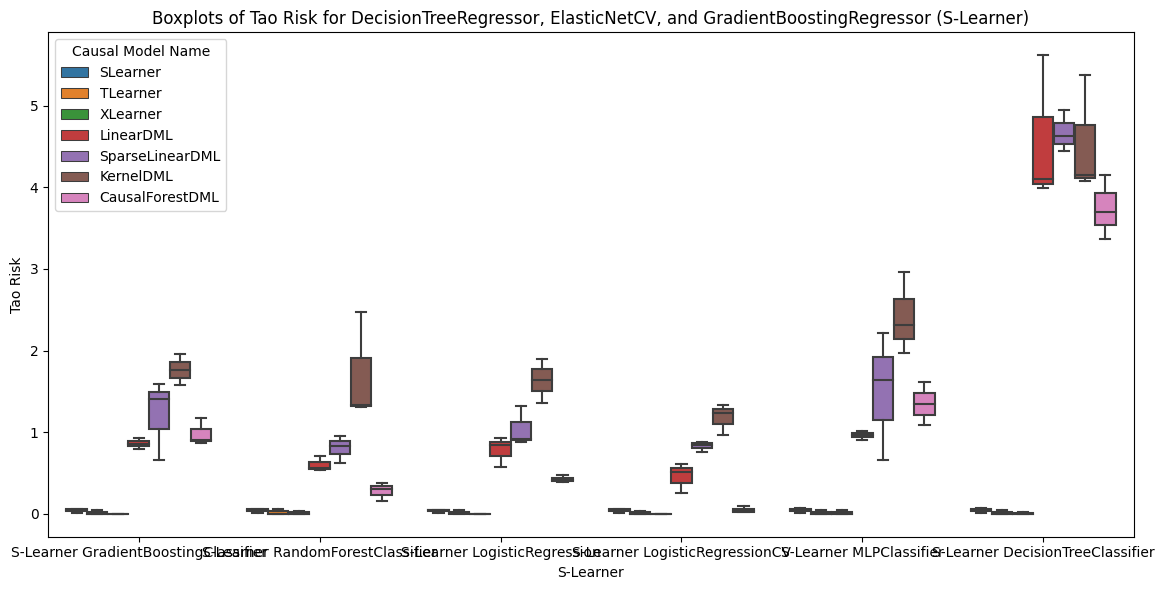

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# df = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading the data from a CSV file

# Filter the DataFrame to only include rows with the specified models
models = ['DecisionTreeRegressor', 'ElasticNetCV', 'GradientBoostingRegressor']
df_filtered = ihdp_results[ihdp_results['model_y'].isin(models)]

# Create a new column with S-Learner information
df_filtered['s_learner'] = 'S-Learner ' + df_filtered['model_t'].astype(str)

# Create boxplots for tao_risk
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='s_learner', y='tao_risk', hue='causal_model_name')
plt.title('Boxplots of Tao Risk for DecisionTreeRegressor, ElasticNetCV, and GradientBoostingRegressor (S-Learner)')
plt.xlabel('S-Learner')
plt.ylabel('Tao Risk')
plt.legend(title='Causal Model Name')
plt.tight_layout()
plt.savefig("tao_risk_boxplots_s_learner.png")
plt.show()


In [70]:
ihdp_results['causal_model_name'].unique()

array(['SLearner', 'TLearner', 'XLearner', 'LinearDML', 'SparseLinearDML',
       'KernelDML', 'CausalForestDML'], dtype=object)

In [86]:
ihdp_results['tao_risk']

ValueError: Boolean array expected for the condition, not object

In [99]:
df_filtered['causal_model_name']

0             SLearner
1             SLearner
2             SLearner
3             SLearner
4             SLearner
            ...       
435    CausalForestDML
441    CausalForestDML
447    CausalForestDML
453    CausalForestDML
459    CausalForestDML
Name: causal_model_name, Length: 192, dtype: object

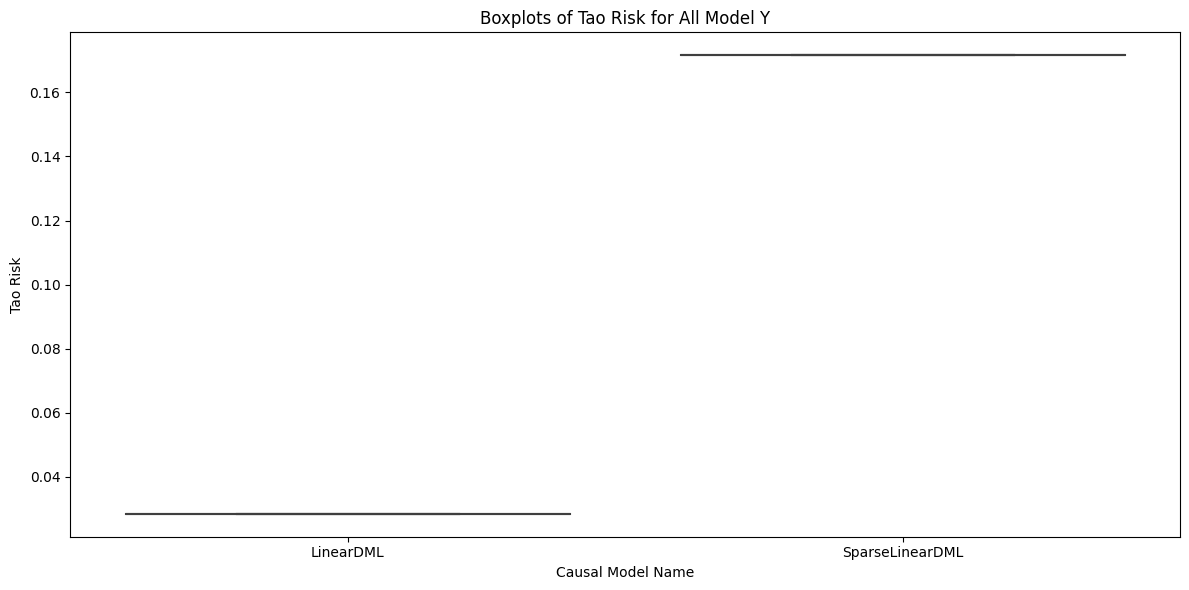

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# df = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading the data from a CSV file

# Filter the DataFrame to only include rows with the specified models

df_filtered = ihdp_results[ihdp_results['tao_risk'] < 0.2]
ci_models = ['LinearDML', 'CausualForestDML', 'KernelDML', 'SparseLinearDML']
df_filtered = df_filtered[df_filtered['causal_model_name'].isin(ci_models)]

# Create boxplots for tao_risk
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='causal_model_name', y='tao_risk')
plt.title('Boxplots of Tao Risk for All Model Y')
plt.xlabel('Causal Model Name')
plt.ylabel('Tao Risk')
plt.tight_layout()
plt.savefig("all_tao_risk_boxplots.png")
plt.show()


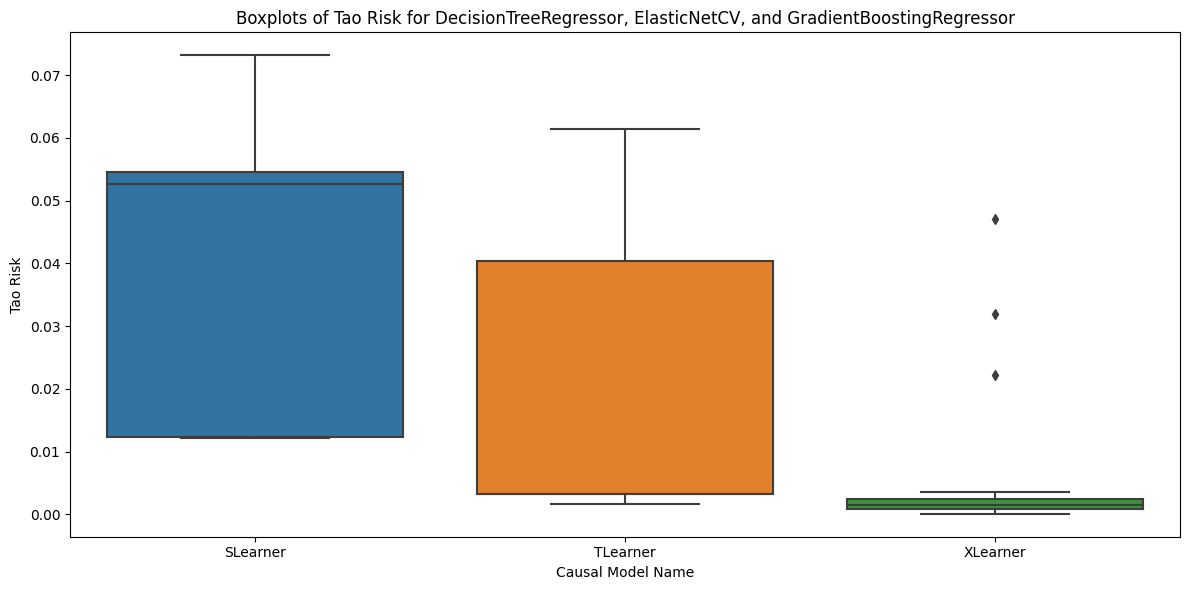

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# df = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading the data from a CSV file

# Filter the DataFrame to only include rows with the specified models
models = ['DecisionTreeRegressor', 'ElasticNetCV', 'GradientBoostingRegressor']
df_filtered = ihdp_results[ihdp_results['model_y'].isin(models)]
ci_models = ['SLearner', 'XLearner', 'TLearner']
df_filtered = df_filtered[df_filtered['causal_model_name'].isin(ci_models)]
# Create boxplots for tao_risk
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='causal_model_name', y='tao_risk')
plt.title('Boxplots of Tao Risk for DecisionTreeRegressor, ElasticNetCV, and GradientBoostingRegressor')
plt.xlabel('Causal Model Name')
plt.ylabel('Tao Risk')
plt.tight_layout()
plt.savefig("meta_tao_risk_boxplots.png")
plt.show()


In [76]:
mask = ihdp_results['causal_model_name'].isin(models)

In [77]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
457    False
458    False
459    False
460    False
461    False
Name: causal_model_name, Length: 462, dtype: bool

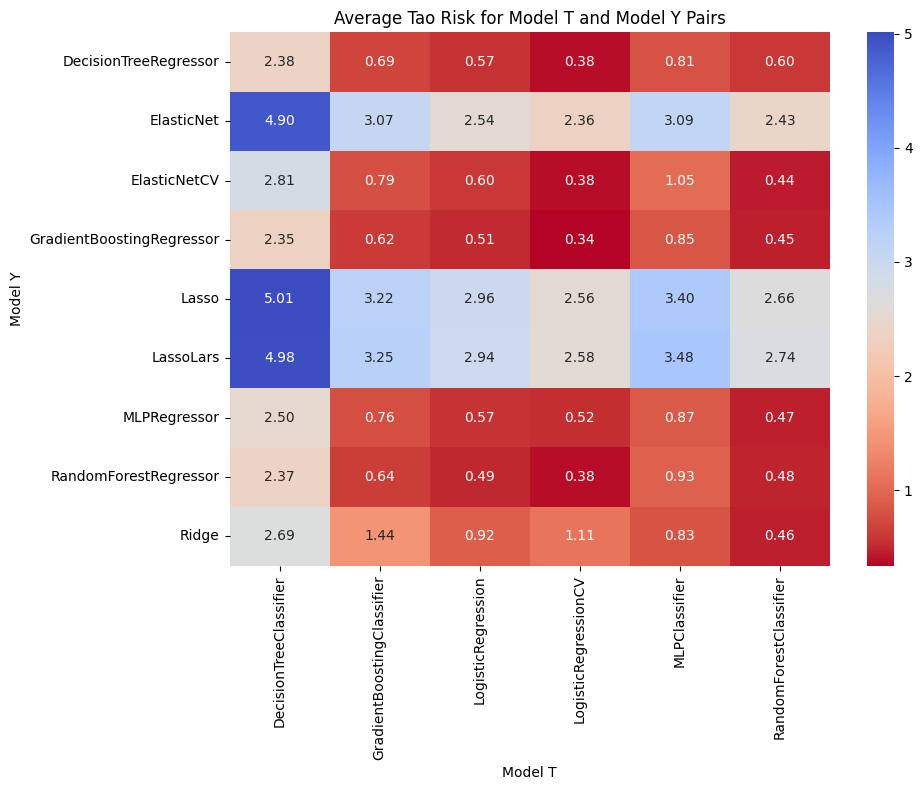

In [61]:
no_linear_regression = ihdp_results[ihdp_results['model_y'] != 'LinearRegression']
no_linear_regression = no_linear_regression[no_linear_regression['model_y'] != 'OrthogonalMatchingPursuit']
heatmap_data = no_linear_regression.pivot_table(index='model_y', columns='model_t', values='tao_risk', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm_r', annot=True, fmt='.2f')
plt.title('Average Tao Risk for Model T and Model Y Pairs')
plt.xlabel('Model T')
plt.ylabel('Model Y')
plt.tight_layout()
plt.savefig("tao_risk_heatmap.png")
plt.show()

ValueError: Maximum allowed size exceeded

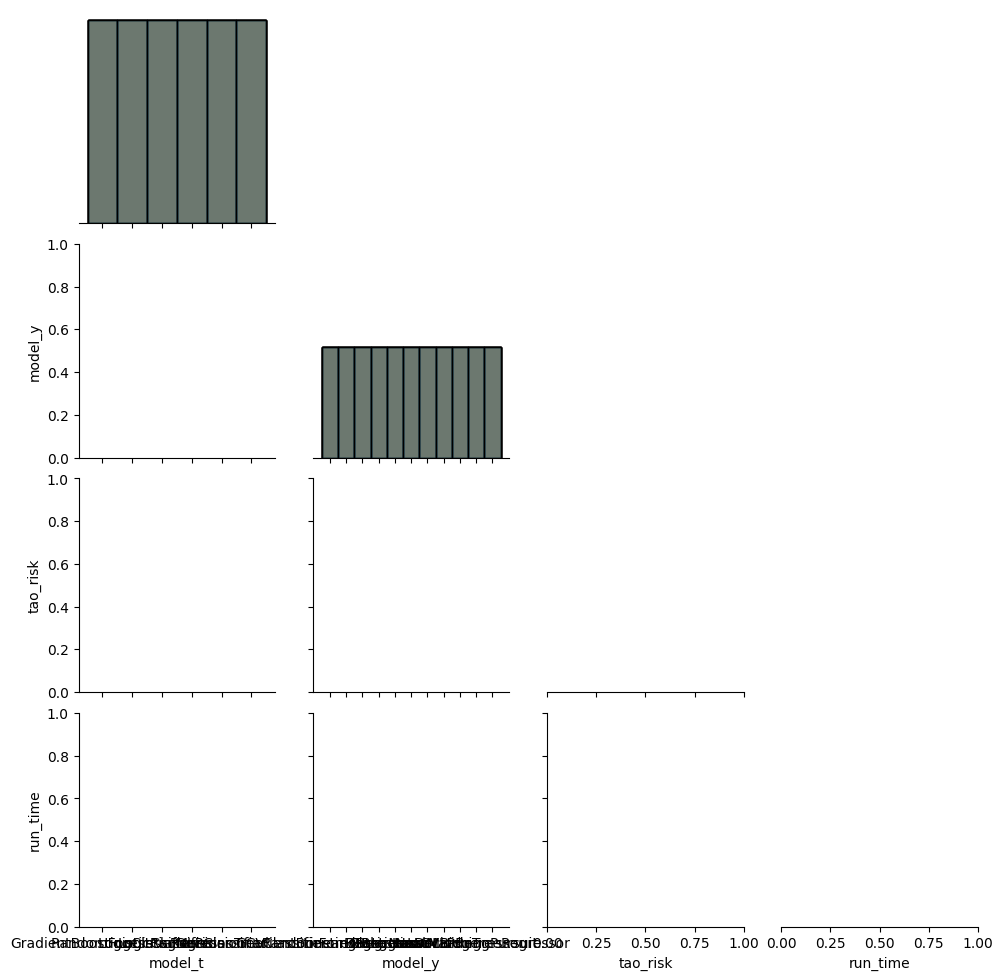

In [57]:
g = sns.pairplot(data=ihdp_results, vars=['model_t', 'model_y', 'tao_risk', 'run_time'], hue='causal_model_name', diag_kind='hist', corner=True)
g.fig.suptitle('Pairwise Relationships for Model T, Model Y, Tao Risk, and Run Time', y=1.05)
plt.savefig("pairwise_relationships.png")
plt.show()

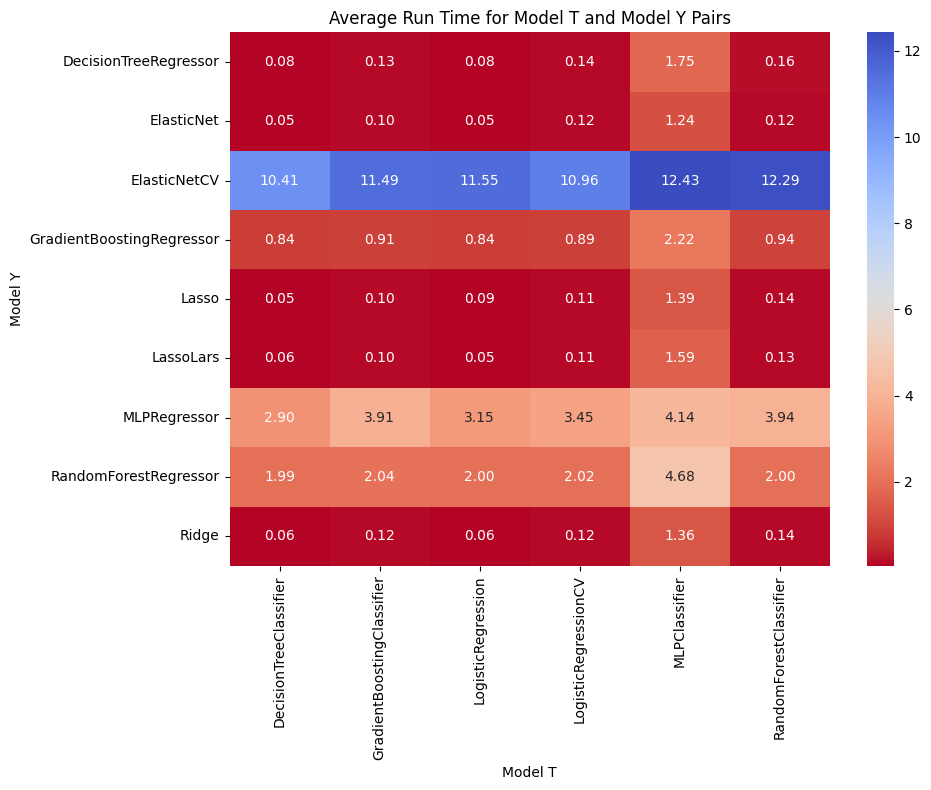

In [62]:
no_linear_regression = ihdp_results[ihdp_results['model_y'] != 'LinearRegression']
# no_linear_regression = no_linear_regression[no_linear_regression['model_y'] != 'ElasticNetCV']
no_linear_regression = no_linear_regression[no_linear_regression['model_y'] != 'OrthogonalMatchingPursuit']

heatmap_data = no_linear_regression.pivot_table(index='model_y', columns='model_t', values='run_time', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm_r', annot=True, fmt='.2f')
plt.title('Average Run Time for Model T and Model Y Pairs')
plt.xlabel('Model T')
plt.ylabel('Model Y')
plt.tight_layout()
plt.savefig("runtime_heatmap.png")
plt.show()

In [50]:
heatmap_data

model_t,DecisionTreeClassifier,GradientBoostingClassifier,LogisticRegression,LogisticRegressionCV,MLPClassifier,RandomForestClassifier
model_y,,,,,,
DecisionTreeRegressor,2.377940e+00,6.917157e-01,5.710579e-01,3.786053e-01,8.078734e-01,5.959531e-01
ElasticNet,4.899421e+00,3.070311e+00,2.540197e+00,2.362892e+00,3.094896e+00,2.434975e+00
ElasticNetCV,2.805898e+00,7.853086e-01,6.048834e-01,3.817901e-01,1.047401e+00,4.382843e-01
GradientBoostingRegressor,2.352831e+00,6.156721e-01,5.106042e-01,3.380656e-01,8.486671e-01,4.525741e-01
Lasso,5.011766e+00,3.218793e+00,2.963083e+00,2.561187e+00,3.402347e+00,2.663481e+00
LassoLars,4.976620e+00,3.250901e+00,2.941146e+00,2.582947e+00,3.476566e+00,2.738113e+00
LinearRegression,4.158117e+21,4.735020e+20,6.387582e+23,1.165793e+25,6.301169e+22,3.614858e+22
MLPRegressor,2.499454e+00,7.612674e-01,5.736699e-01,5.230948e-01,8.715474e-01,4.650380e-01
OrthogonalMatchingPursuit,2.536133e+00,8.057294e-01,6.307755e-01,3.658452e-01,1.069744e+00,5.853724e-01


In [47]:
def get_lowest_5_tao_risk(group):
    return group.nsmallest(3, 'tao_risk')

lowest_5_tao_risk = ihdp_results.groupby('causal_model_name', group_keys=False).apply(get_lowest_5_tao_risk)

# Reset the index and drop the original index
lowest_5_tao_risk = lowest_5_tao_risk.reset_index(drop=True)

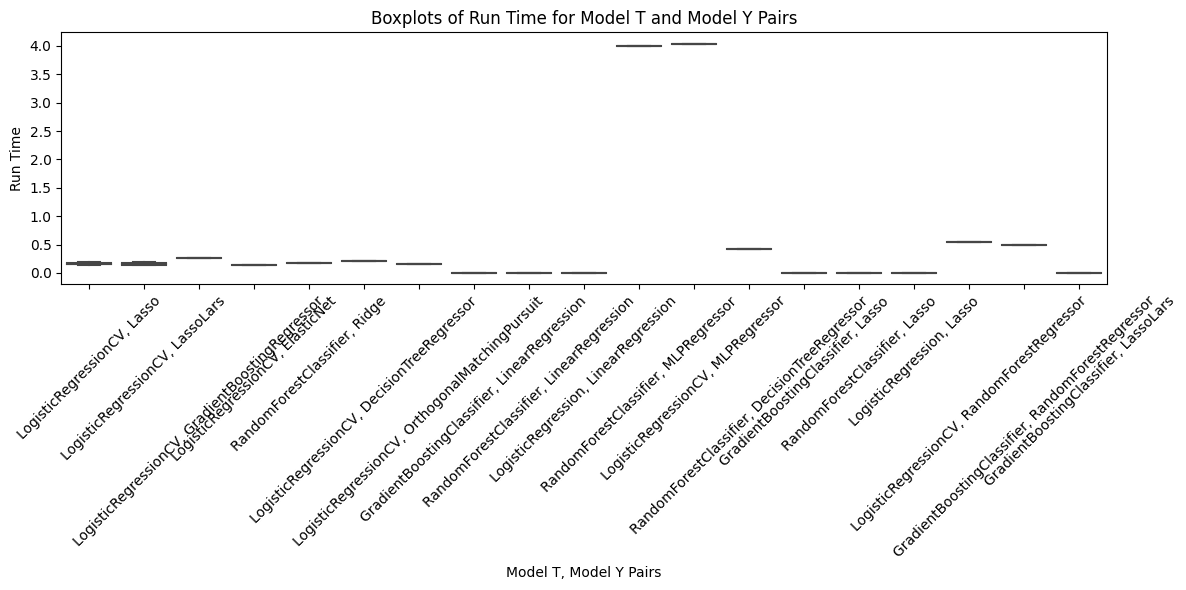

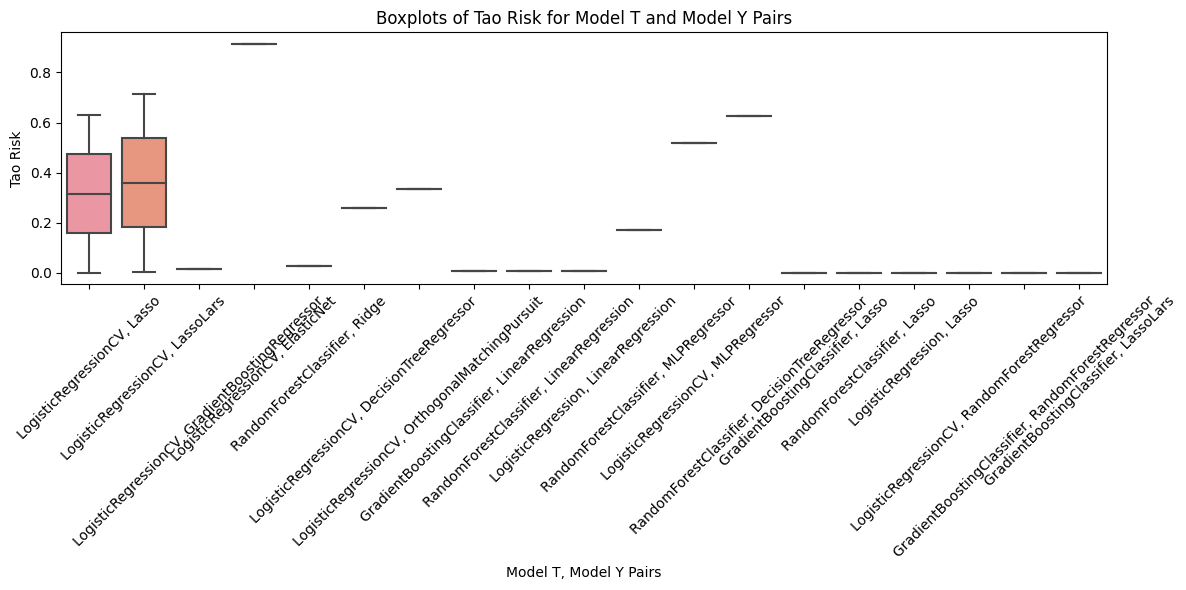

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# df = pd.read_csv('your_data.csv')  # Uncomment this line if you're loading the data from a CSV file

# Create a new column with combined model_t and model_y as a string
lowest_5_tao_risk['model_ty_pair'] = lowest_5_tao_risk['model_t'].astype(str) + ", " + lowest_5_tao_risk['model_y'].astype(str)

# Create boxplots for run_time
plt.figure(figsize=(12, 6))
sns.boxplot(data=lowest_5_tao_risk, x='model_ty_pair', y='run_time')
plt.title('Boxplots of Run Time for Model T and Model Y Pairs')
plt.xlabel('Model T, Model Y Pairs')
plt.ylabel('Run Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("run_time_boxplots.png")
plt.show()

# Create boxplots for tao_risk
plt.figure(figsize=(12, 6))
sns.boxplot(data=lowest_5_tao_risk, x='model_ty_pair', y='tao_risk')
plt.title('Boxplots of Tao Risk for Model T and Model Y Pairs')
plt.xlabel('Model T, Model Y Pairs')
plt.ylabel('Tao Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("tao_risk_boxplots.png")
plt.show()


In [34]:
best_combinations = ihdp_results.loc[best_indices]

# Reset the index and drop the original index
best_combinations = best_combinations.reset_index(drop=True)

In [9]:
from econml.orf import DMLOrthoForest

In [7]:
import pandas as pd
import numpy as np

#The covariates data has 46 features
x = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_X_3years_samesex.csv")

#The outcome data contains mortality of the lighter and heavier twin
y = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_Y_3years_samesex.csv")

#The treatment data contains weight in grams of both the twins
t = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_T_3years_samesex.csv")

lighter_columns = ['pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
       'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
       'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
       'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
       'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
       'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
       'data_year', 'nprevistq', 'dfageq', 'feduc6', 'infant_id_0',
       'dlivord_min', 'dtotord_min', 'bord_0',
       'brstate_reg', 'stoccfipb_reg', 'mplbir_reg']
heavier_columns = [ 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
       'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
       'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
       'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
       'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
       'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
       'data_year', 'nprevistq', 'dfageq', 'feduc6',
       'infant_id_1', 'dlivord_min', 'dtotord_min', 'bord_1',
       'brstate_reg', 'stoccfipb_reg', 'mplbir_reg']

#Since data has pair property,processing the data to get separate row for each twin so that each child can be treated as an instance
data = []

for i in range(len(t.values)):
    
    #select only if both <=2kg
    if t.iloc[i].values[1]>=2000 or t.iloc[i].values[2]>=2000:
        continue
    
    this_instance_lighter = list(x.iloc[i][lighter_columns].values)
    this_instance_heavier = list(x.iloc[i][heavier_columns].values)
    
    #adding weight
    this_instance_lighter.append(t.iloc[i].values[1])
    this_instance_heavier.append(t.iloc[i].values[2])
    
    #adding treatment, is_heavier
    this_instance_lighter.append(0)
    this_instance_heavier.append(1)
    
    #adding the outcome
    this_instance_lighter.append(y.iloc[i].values[1])
    this_instance_heavier.append(y.iloc[i].values[2])
    data.append(this_instance_lighter)
    data.append(this_instance_heavier)
cols = [ 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
       'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
       'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
       'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
       'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
       'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
       'data_year', 'nprevistq', 'dfageq', 'feduc6',
       'infant_id', 'dlivord_min', 'dtotord_min', 'bord',
       'brstate_reg', 'stoccfipb_reg', 'mplbir_reg','wt','treatment','outcome']
df = pd.DataFrame(columns=cols,data=data)
df = df.astype({"treatment":'bool'}, copy=False) #explicitly assigning treatment column as boolean 

df.fillna(value=df.mean(),inplace=True)    #filling the missing values
df.fillna(value=df.mode().loc[0],inplace=True)

data_1 = df[df["treatment"]==1]
data_0 = df[df["treatment"]==0]

ITE = data_1["outcome"] - data_0["outcome"]
ATE =  np.mean(ITE)


In [9]:
df.treatment.value_counts()

False    11984
True     11984
Name: treatment, dtype: int64

In [12]:
data = np.load('../datasets/IHDP/ihdp_splits_10iters_10folds.npz', allow_pickle=True)
# n_iters = options.iters if options.iters > 0 else splits.shape[0]


In [104]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, ElasticNetCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

models_and_parameters = [    ('elastic', ElasticNetCV(), {}),    
('forest', RandomForestRegressor(),        {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
        'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]}),
    ('gbf', GradientBoostingRegressor(),
        {"n_estimators": [100, 300, 500, 700, 1000],
        "max_depth": [2, 4, 6, 8, 10],
        "min_samples_split": [5, 10, 15, 20],
        "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]}),
    ('nnet', MLPRegressor(),
        {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
        'learning_rate_init': [0.0001, 0.001],
        'batch_size': [32, 64, 128, 250]})
]
models_dict = {name: (model, params) for name, model, params in models_and_parameters}

In [118]:

 #The covariates data has 46 features
x = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_X_3years_samesex.csv")

#The outcome data contains mortality of the lighter and heavier twin
y = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_Y_3years_samesex.csv")

#The treatment data contains weight in grams of both the twins
t = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_T_3years_samesex.csv")

lighter_columns = ['pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
    'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
    'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
    'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
    'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
    'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
    'data_year', 'nprevistq', 'dfageq', 'feduc6', 'infant_id_0',
    'dlivord_min', 'dtotord_min', 'bord_0',
    'brstate_reg', 'stoccfipb_reg', 'mplbir_reg']
heavier_columns = [ 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
    'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
    'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
    'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
    'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
    'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
    'data_year', 'nprevistq', 'dfageq', 'feduc6',
    'infant_id_1', 'dlivord_min', 'dtotord_min', 'bord_1',
    'brstate_reg', 'stoccfipb_reg', 'mplbir_reg']

#Since data has pair property,processing the data to get separate row for each twin so that each child can be treated as an instance
data = []

for i in range(len(t.values)):
    
    #select only if both <=2kg
    if t.iloc[i].values[1]>=2000 or t.iloc[i].values[2]>=2000:
        continue
    
    this_instance_lighter = list(x.iloc[i][lighter_columns].values)
    this_instance_heavier = list(x.iloc[i][heavier_columns].values)
    
    #adding weight
    this_instance_lighter.append(t.iloc[i].values[1])
    this_instance_heavier.append(t.iloc[i].values[2])
    
    #adding treatment, is_heavier
    this_instance_lighter.append(0)
    this_instance_heavier.append(1)
    
    #adding the outcome
    this_instance_lighter.append(y.iloc[i].values[1])
    this_instance_heavier.append(y.iloc[i].values[2])
    data.append(this_instance_lighter)
    data.append(this_instance_heavier)
cols = [ 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8',
    'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir', 'mpre5', 'adequacy',
    'orfath', 'frace', 'birmon', 'gestat10', 'csex', 'anemia', 'cardiac',
    'lung', 'diabetes', 'herpes', 'hydra', 'hemo', 'chyper', 'phyper',
    'eclamp', 'incervix', 'pre4000', 'preterm', 'renal', 'rh', 'uterine',
    'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5', 'crace',
    'data_year', 'nprevistq', 'dfageq', 'feduc6',
    'infant_id', 'dlivord_min', 'dtotord_min', 'bord',
    'brstate_reg', 'stoccfipb_reg', 'mplbir_reg','wt','treatment','outcome']
df = pd.DataFrame(columns=cols,data=data)
df = df.astype({"treatment":'bool'}, copy=False) #explicitly assigning treatment column as boolean 

df.fillna(value=df.mean(),inplace=True)    #filling the missing values
df.fillna(value=df.mode().loc[0],inplace=True)

data_1 = df[df["treatment"]==1].reset_index()
data_0 = df[df["treatment"]==0].reset_index()

true_ITE = data_1["outcome"] - data_0["outcome"]
true_ATE =  np.mean(true_ITE)
true_ATE_stderr = np.std(true_ITE)

T = df['treatment'].astype(int)
Y = df['outcome']
X = df.drop(['treatment', 'outcome'], axis=1)
is_discrete = True

In [117]:
X.shape

(23968, 51)

0.16421895861148197
0.1894192256341789
ATE -0.025200267022696926


In [25]:
models_dict = {name: {'model': model, 'parameters': params} for name, model, params in models_and_parameters}

In [26]:
models_dict

{'elastic': {'model': ElasticNetCV(), 'parameters': {}},
 'forest': {'model': RandomForestRegressor(),
  'parameters': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
   'min_samples_leaf': [0.01,
    0.02,
    0.03,
    0.04,
    0.05,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9]}},
 'gbf': {'model': GradientBoostingRegressor(),
  'parameters': {'n_estimators': [100, 300, 500, 700, 1000],
   'max_depth': [2, 4, 6, 8, 10],
   'min_samples_split': [5, 10, 15, 20],
   'learning_rate': [0.001, 0.01, 0.1, 0.2, 1]}},
 'nnet': {'model': MLPRegressor(),
  'parameters': {'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
   'learning_rate_init': [0.0001, 0.001],
   'batch_size': [32, 64, 128, 250]}}}